# Проверка распределения данных

Сколько всего собрано позиций и с какой плотностью

In [19]:
import h5py
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [4]:
dataset_path = "/Volumes/SSD/mark/Documents/Works/MT_Dataset/mt_master_20250714.h5"

In [5]:
ds = h5py.File(dataset_path, "r")
for attr in ds.attrs:
    print(f"{attr}: {ds.attrs[attr]}")

author: Mark Vodyanitskiy (mvodya@icloud.com)
created_at: 2025-07-13T14:26:08.378871
sources_count: 27555
sources_size: 439.3Gb
version: 1.0


In [15]:
first_name = ds["files"]["name"][:-1][0].decode('utf-8')
last_name = ds["files"]["name"][-1:][0].decode('utf-8')

print(f"Первый файл: {first_name}\nПоследний файл: {last_name}")

Первый файл: 29.10.2024_11_26.json
Последний файл: 10.07.2025_07_26.json


In [10]:
# Получает список датасетов в диапазоне дат
def find_hdf5_dataset_paths(h5_path, start_date, end_date):
    results = []
    date_fmt = "%Y-%m-%d"
    start = datetime.strptime(start_date, date_fmt)
    end = datetime.strptime(end_date, date_fmt)

    with h5py.File(h5_path, "r") as f:
        current = start
        while current <= end:
            y = str(current.year)
            m = f"{current.month:02d}"
            d = f"{current.day:02d}"
            group_path = f"/positions/{y}/{m}/{d}"
            if group_path in f:
                results.append(group_path)
            current += timedelta(days=1)

    return results
    
find_hdf5_dataset_paths(dataset_path, "2025-04-01", "2025-04-03")

['/positions/2025/04/01', '/positions/2025/04/02', '/positions/2025/04/03']

In [12]:
def path_to_date(path):
    parts = path.strip('/').split('/')
    return f"{parts[1]}-{parts[2]}-{parts[3]}"
path_to_date("/positions/2025/04/02")

'2025-04-02'

In [20]:
paths = find_hdf5_dataset_paths(dataset_path, "2024-10-29", "2025-07-10")

data = []

for path in tqdm(paths):
    data.append((path_to_date(path), len(ds[path])))

data[:10]

100%|██████████| 247/247 [00:00<00:00, 42043.47it/s]


[('2024-10-29', 3171741),
 ('2024-10-30', 5276540),
 ('2024-10-31', 4403230),
 ('2024-11-01', 2222717),
 ('2024-11-02', 3197938),
 ('2024-11-03', 3483103),
 ('2024-11-04', 3423889),
 ('2024-11-05', 4139476),
 ('2024-11-06', 3517305),
 ('2024-11-07', 2270916)]

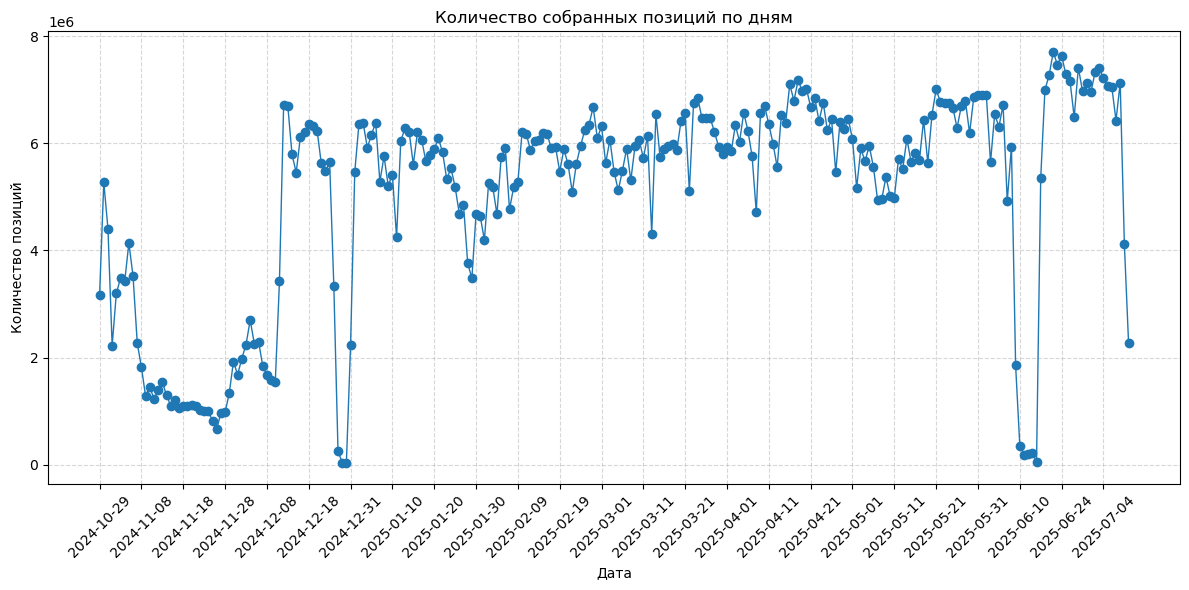

In [28]:
# Распаковка
dates, counts = zip(*data)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(dates, counts, marker='o', linestyle='-', linewidth=1)

# Настройка меток на оси X — только каждую 10-ю
step = 10
plt.xticks(ticks=range(0, len(dates), step), labels=[dates[i] for i in range(0, len(dates), step)], rotation=45)

plt.xlabel("Дата")
plt.ylabel("Количество позиций")
plt.title("Количество собранных позиций по дням")
plt.grid(True, which='major', linestyle='--', alpha=0.5)
plt.locator_params(axis='y', nbins=8)
plt.tight_layout()
plt.show()